<h1 style="background-color:#d9ead3; padding:10px; text-align:center;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">STUDENT PERFORMANCE DATASET</h1>


<p style="background-color:#e8f5e3; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
    Il dataset "Student Performance" si distingue per la sua ricchezza di informazioni, offrendo una panoramica dettagliata sui diversi fattori che influenzano l'apprendimento e i risultati accademici degli studenti. Dai dati demografici, come età e sesso, alle informazioni più specifiche su abitudini di studio e supporto familiare, questo insieme di dati permette una comprensione multidimensionale delle dinamiche scolastiche. Attraverso l'analisi di tali variabili, ricercatori ed educatori possono identificare tendenze significative, determinare l'impatto di vari fattori esterni e interni sul rendimento scolastico, e sviluppare strategie mirate per migliorare l'efficacia dell'insegnamento e dell'apprendimento.
</p>


<p style="background-color:#e8f5e3; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
    In questo progetto, esploreremo un dataset per comprendere meglio le relazioni tra diverse variabili e costruire un modello di regressione lineare per fare previsioni accurate. La nostra analisi inizia con l'importazione delle librerie necessarie in Python, che includono pandas per la manipolazione dei dati, numpy per le operazioni numeriche, matplotlib e seaborn per la visualizzazione dei dati, e scikit-learn per il preprocessing e la modellazione. Dopo aver importato le librerie, carichiamo il dataset utilizzando pandas. La gestione dei valori mancanti è il nostro prossimo passo: decidiamo se imputarli o eliminarli in base alla loro quantità e al tipo di analisi prevista. Segue la gestione degli outliers, che potrebbero distorcere i risultati del modello. Utilizziamo tecniche statistiche per identificarli e decidiamo se correggerli o rimuoverli. Successivamente, standardizziamo i dati utilizzando il StandardScaler di scikit-learn. Questo passaggio è cruciale per molti algoritmi di machine learning che presuppongono che tutte le caratteristiche siano su una scala comune. Una volta standardizzati i dati, procediamo con la divisione del dataset in un set di training e uno di test, garantendo che entrambi contengano una rappresentazione simile delle varie classi presenti nel dataset. Per offrire una visione più approfondita dei dati, generiamo una serie di "grafici carini" che mostrano statistiche interessanti. Questi possono includere grafici a dispersione per visualizzare le relazioni bivariate, istogrammi per esaminare le distribuzioni delle variabili e box plots per evidenziare la presenza di outliers. Infine, costruiamo un modello di regressione lineare utilizzando il set di training. Questo modello ci aiuterà a capire l'importanza e l'impatto di ogni variabile sulle variabili di risposta. Valutiamo il modello sul set di test per verificare la sua accuratezza e la sua capacità di generalizzare su nuovi dati non visti durante il training.
Attraverso questi passaggi, non solo prepariamo il dataset per l'analisi, ma possiamo anche trarre insight significativi e fare previsioni informate, mettendo in luce il potenziale del machine learning applicato alla data analysis.
    
</p>


<h2 style="color:#D6EEC4; padding:10px; text-align:left; text-shadow: 1px 1px 1px #000000; ">Importazione librerie necessarie</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.calibration import CalibratedClassifierCV

<h2 style="color:#D6EEC4; padding:10px; text-align:left; text-shadow: 1px 1px 1px #000000; ">Importazione del dataset</h2>

In [5]:
# Caricamento del dataset Student performance, file CSV
df = pd.read_csv('C:\\Users\\david\\Downloads\\StudentsPerformance.csv')

In [3]:
# Stampa delle prime righe del DataFrame per verificare che sia stato caricato correttamente e per leggerle
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


<h2 style="color:#c2e2ff; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> La Gestione dei missing values</h2>

<p style="background-color:#c2e2ff; color:#000000; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
    I "missing values", o valori mancanti, si riferiscono a dati che sono assenti in un dataset. Questa assenza può derivare da vari motivi, come errori nella raccolta dei dati, perdita di informazioni o mancata risposta a determinate domande in un sondaggio. La gestione di questi valori mancanti è cruciale nell'analisi dei dati per diverse ragioni come ad esempio il fatto che siano capaci di influenzare radicalmente le conclusioni del dataset.

</p>


<p style="background-color:#c2e2ff; color:#000000; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
    Perciò il codice sotto verifica la presenza di valori mancanti (missing values) del nostro file CSV e comunica i risultati. In questo caso nel dataset non erano presenti missing values e perciò viene proprio stampata con ''Print'' la loro non presenza. Ad ogni modo questo processo è cruciale all'inizio dell'analisi dei dati perché se son presenti missing values, possono influenzare significativamente le conclusioni dell'analisi.
</p>


In [6]:
# Conteggio dei valori mancanti per ogni colonna
missing_values = df.isnull().sum()

# Stampa il numero di valori mancanti per ogni colonna se esistono valori mancanti
if missing_values.any():
    print("Numero di valori mancanti per ogni colonna:")
    print(missing_values[missing_values > 0])
else:
    print("Nessun valore mancante nel dataset.")


Nessun valore mancante nel dataset.


<p style="background-color:#c2e2ff; color:#000000; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
   Qui si calcolano le percentuali di valori mancanti e non mancanti. Successivamente, visualizza queste informazioni attraverso un grafico a torta colorato e facilmente interpretabile, con una sezione "explode" per dare risalto ai valori non mancanti. L'obiettivo è fornire un'illustrazione visiva della qualità dei dati analizzando la presenza di valori mancanti nel dataset. 
</p>





<p style="background-color:#c2e2ff; color:#000000; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
   TRA L'ALTRO In Python, "explode" è un termine comunemente associato ai DataFrame della libreria pandas. Questo metodo è utilizzato per trasformare ogni elemento di una lista presente in una riga di un DataFrame in righe separate, mantenendo il valore di tutte le altre colonne invariate. Di fatto, "explode" permette di "espandere" una lista contenuta in una singola cella di un DataFrame in multiple righe, rendendo ogni elemento della lista il valore di una nuova riga.
</p>





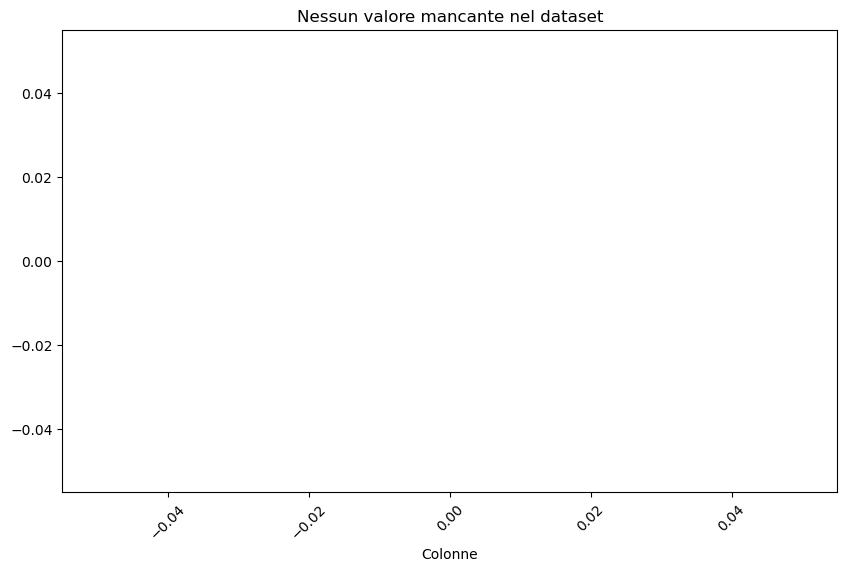

In [7]:
# Calcolo dei valori mancanti per ogni colonna
missing_values = df.isnull().sum()

# Impostazioni per il grafico a barre
plt.figure(figsize=(10, 6))

if missing_values.any():
    sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
    plt.title('Numero di valori mancanti per ogni colonna')
    plt.ylabel('Numero di valori mancanti')
else:
    plt.bar([], [])
    plt.title('Nessun valore mancante nel dataset')

plt.xlabel('Colonne')
plt.xticks(rotation=45)
plt.show()


<h2 style="color:#d9d2e9; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> La Gestione degli Outliers </h2>


<p style="background-color:#d9d2e9; color:#000000; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
   Gli outlier sono valori anomali che si distaccano notevolmente dalla normale distribuzione dei dati. Questi valori "fuori scala" possono influenzare drasticamente le previsioni di un modello statistico e vengono gestiti proprio per questo.

</p>


<p style="background-color:#d9d2e9; color:#000000; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
 L'obbiettivo principale del codice qui sotto calcolare la media e la deviazione standard dei voti in queste materie, definire un criterio per identificare gli outliers (in questo caso quindi punteggi anomali) basato su due deviazioni standard dalla media, e infine mostrare LE prime righe le csv. Proprio per questo, noi non vediamo ancora gli outliers. 
</p>

In [8]:
# Definizione dell'intervallo di confidenza a due deviazioni standard
k=2

#colonne per indicare gli outliers per ogni feature numerica con il nuovo limite
for feature in ['math score', 'reading score', 'writing score']:
    mean_value = df[feature].mean()
    std_dev = df[feature].std()
    
    # Calcolo degli outlier con il nuovo limite
    df['Outlier_' + feature] = ((df[feature] > mean_value + k * std_dev) |
                                      (df[feature] < mean_value - k * std_dev))

# Mostra il DataFrame aggiornato con le nuove colonne degli outliers
df[['math score', 'Outlier_math score', 'reading score', 'Outlier_reading score', 'writing score', 'Outlier_writing score']].head()

,math score,Outlier_math score,reading score,Outlier_reading score,writing score,Outlier_writing score
0,72,False,72,False,74,False
1,69,False,90,False,88,False
2,90,False,95,False,93,False
3,47,False,57,False,44,False
4,76,False,78,False,75,False



<p style="background-color:#d9d2e9; color:#000000; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
Qui invece stampiamo effettivamente quanti outliers sono presenti per materia.
</p>

In [9]:
# Conto degli outlier per ogni feature numerica
num_outliers = {
    feature: df['Outlier_' + feature].sum()
    for feature in ['math score', 'reading score', 'writing score']
}

print(f"Gli outlier per materia sono: {num_outliers}")

Gli outlier per materia sono: {'math score': 46, 'reading score': 46, 'writing score': 42}


<p style="background-color:#d9d2e9; color:#000000; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
 Dopo aver identificato gli outliers, creiamo un grafico nel codice qui sotto mostrandoli per materia. Proprio come vediamo la quantità di outliers per materia non sono neanche troppo differenti.
 
</p>

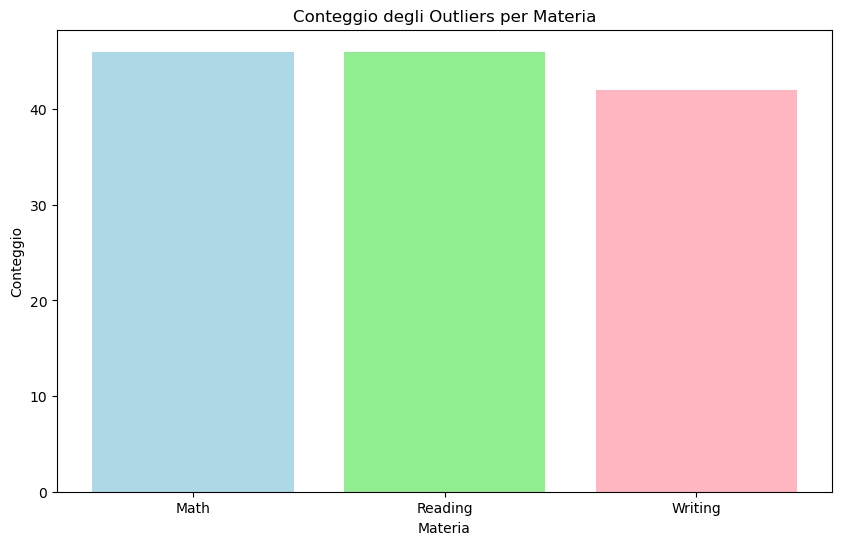

In [10]:
# Nomi delle materie per il grafico
materie = ['Math', 'Reading', 'Writing']

# Conteggi degli outlier per il grafico
conteggi = [num_outliers['math score'], num_outliers['reading score'], num_outliers['writing score']]

# Creazione del grafico a barre per il conteggio degli outlier
plt.figure(figsize=(10,6))
bars = plt.bar(materie, conteggi, color=['lightblue', 'lightgreen', 'lightpink'])

# Aggiunta del titolo e delle etichette degli assi
plt.title('Conteggio degli Outliers per Materia')
plt.xlabel('Materia')
plt.ylabel('Conteggio')

# Mostra il grafico
plt.show()



<p style="background-color:#d9d2e9; color:#000000; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
Perciò, con questo codice, andremo a rimuovere gli outlier. Ed il risultato sarà che 1000 rappresenta le righe rimaste nel DataFrame dopo la rimozione degli outlier, mentre il numero 8 rappresenta il numero di colonne. 
</p>

In [11]:
# Rimozione degli outlier dal DataFrame
df_pulito = df[(df['Outlier_math score'] == False) &
                          (df['Outlier_reading score'] == False) &
                          (df['Outlier_writing score'] == False)]

# Rimozione delle colonne degli outlier dal DataFrame pulito
df_pulito = df.drop(columns=['Outlier_math score', 'Outlier_reading score', 'Outlier_writing score'])

# Mostra le dimensioni del DataFrame pulito per confermare la rimozione
df_pulito.shape


(1000, 8)

<h2 style="color:#fce5cd; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> Lo scaling </h2>




<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
  Lo scaling è una tecnica usata in data science per regolare la scala dei dati numerici. Questo processo è importante perché i modelli di machine learning lavorano meglio quando i dati su cui sono addestrati hanno scale simili. In pratica, lo scaling può trasformare i punteggi degli esami o i redditi (che possono variare in un ampio intervallo) in valori che sono più facilmente confrontabili e gestibili per un modello. Ci sono diversi metodi di scaling, come lo Standard Scaling, che riduce i dati a una media di zero e una deviazione standard di uno, rendendo così i dati più omogenei e facilitando l'apprendimento del modello.
</p>

<h3 style="color:#f6b26b; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> Metodo standart scaling </h3>


<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
  Lo Standard Scaling è una tecnica di preprocessing dei dati che regola la distribuzione dei valori di ogni caratteristica in modo che abbiano una media (μ) pari a 0 e una deviazione standard (σ) pari a 1. Questo metodo è anche conosciuto come "Z-score normalization". L'idea è di trasformare i dati in modo che si allineino con la distribuzione standard, facilitando la gestione da parte dei modelli di machine learning. Lo Standard Scaling è particolarmente utile quando i dati presentano caratteristiche con scale diverse e si vuole garantire che queste influenzino il modello in modo equilibrato, migliorando così la convergenza durante l'addestramento.
</p>


<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
Qui possiamo visualizzare il grafico prima dell'applicazione del metodo Standart scaling o Z-score normalization
</p>

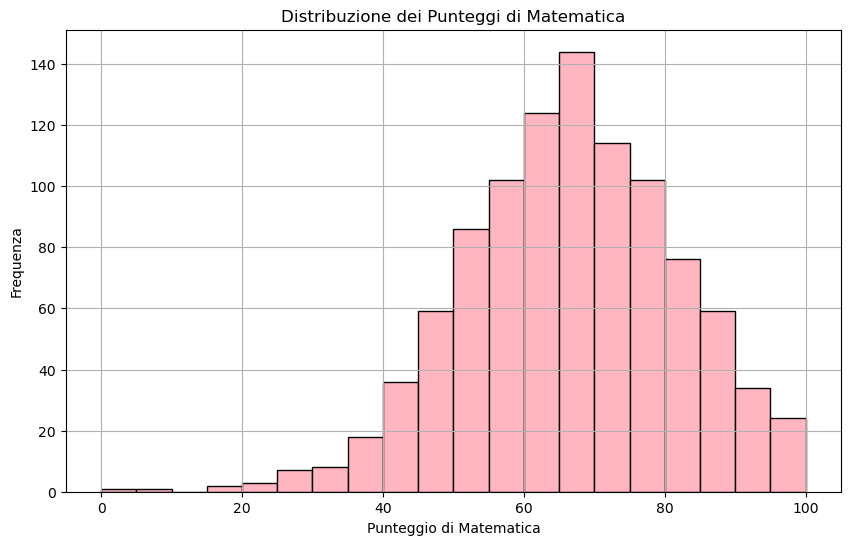

In [12]:
# Crea un istogramma per i punteggi di matematica
plt.figure(figsize=(10, 6))
plt.hist(df['math score'], bins=20, color='lightpink', edgecolor='black')
plt.title('Distribuzione dei Punteggi di Matematica')
plt.xlabel('Punteggio di Matematica')
plt.ylabel('Frequenza')
plt.grid(True)
plt.show()


<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
  Il codice qui sotto è strutturato per normalizzare i dati numerici del nostro dataset degli Students Performance utilizzando la tecnica dello Standard Scaling. Questo metodo di normalizzazione modifica i dati in modo che abbiano media zero e deviazione standard unitaria. 

</p>

In [13]:
# Seleziona solo le colonne con i punteggi per standardizzare questi valori
features = df[['math score', 'reading score', 'writing score']]

# Inizializzazione di StandardScaler
scaler = StandardScaler()

# Ciò calcolerà la media e la deviazione standard per ogni caratteristica
# e poi standardizzerà i dati sottraendo la media e dividendo per la deviazione standard
scaled_features = scaler.fit_transform(features)

# Converte il risultato in un DataFrame per una migliore leggibilità
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Visualizza le prime righe del DataFrame standardizzato
print(scaled_features_df.head())

   math score  reading score  writing score
0    0.390024       0.193999       0.391492
1    0.192076       1.427476       1.313269
2    1.577711       1.770109       1.642475
3   -1.259543      -0.833899      -1.583744
4    0.653954       0.605158       0.457333



<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
Dopo aver applicato lo Standard Scaling al dataset delle prestazioni degli studenti, visualizzeremo la distribuzione dei punteggi di matematica normalizzati.

</p>

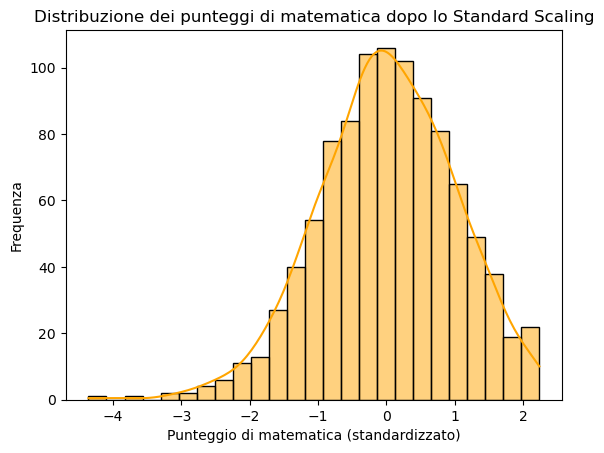

In [14]:
# Crea un istogramma dei dati scalati per 'math score'
sns.histplot(scaled_features_df['math score'], kde=True, color='orange')
plt.title('Distribuzione dei punteggi di matematica dopo lo Standard Scaling')
plt.xlabel('Punteggio di matematica (standardizzato)')
plt.ylabel('Frequenza')
plt.show()


<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
 CURIOSITA': Quando si utilizza il metodo Standard Scaling per standardizzare i dati, modifichi ciascun punteggio in modo che la media dei dati sia 0 e la deviazione standard sia 1. Questa trasformazione cambia la scala dei dati ma non la forma della loro distribuzione. Ecco perché l'aspetto del grafico dell'istogramma rimane invariato anche dopo la standardizzazione.
</p>

<h2 style="color:#ffddea; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> La categoria ordinale </h2>



<p style="background-color:#ffddea; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
 La categoria ordinale si riferisce a una classificazione dove l'ordine tra i valori è significativo, ma non lo è necessariamente la distanza esatta tra di loro. Questo tipo di dato è comune nelle ricerche e nelle analisi statistiche, specialmente quando si valutano caratteristiche qualitative con un ordine intrinseco. Esempi possono includere livelli di accordo (come in un sondaggio con opzioni da "fortemente in disaccordo" a "fortemente d'accordo"), fasi di educazione, o livelli di priorità. 

</p>

In [15]:
# Definisce l'ordine per la colonna 'parental level of education'
education_order = [
    'some high school',
    'high school',
    'some college',
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

# Converte della colonna in una categoria ordinale
df['parental level of education'] = pd.Categorical(df['parental level of education'],
                                                     categories=education_order,
                                                     ordered=True)

# Converte delle categorie ordinate in codici
df['parental level of education code'] = df['parental level of education'].cat.codes

# Visualizza le prime righe per verificare i cambiamenti
print(df[['parental level of education', 'parental level of education code']].head())


  parental level of education  parental level of education code
0           bachelor's degree                                 4
1                some college                                 2
2             master's degree                                 5
3          associate's degree                                 3
4                some college                                 2


<h2 style="color:#a2c4c9; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> Lo Splitting Dataset </h2>

<p style="background-color:#a2c4c9; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
Il dataset splitting è il processo di suddivisione di un dataset in due o più subset distinti, solitamente denominati set di training e set di test. Questa pratica è comunemente utilizzata nell'apprendimento automatico e nella modellazione statistica per valutare le prestazioni di un modello. 

</p>



<p style="background-color:#a2c4c9; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
Utilizzando la libreria scikit-learn precedentemente importata per preparare i dati per l'addestramento e la validazione di un modello di machine learning, questo codice mostra come dividere il nostro dataset di prestazioni degli studenti in un training set e un test set.
</p>

In [16]:

# Utilizza le colonne dei voti come features (X) e 'gender' come target (y)
X = df[['math score', 'reading score', 'writing score']]
y = df['gender']

# Splitting del dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensioni dei set
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (800, 3) (800,)
Test set: (200, 3) (200,)


<p style="background-color:#a2c4c9; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
L'obiettivo di questo grafico è di confermare che lo splitting dei dati ha mantenuto una distribuzione uniforme dei punteggi di matematica tra il training set e il test set, assicurando che entrambi contengano una varietà rappresentativa di punteggi. E' molto importante per l'affidabilità dei risultati dell'addestramento e della valutazione del modello.
</p>

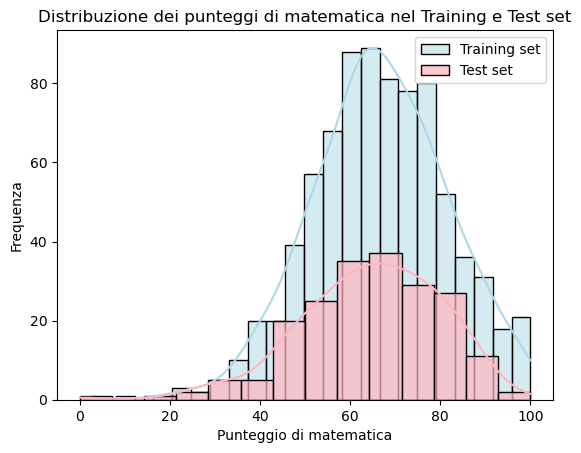

In [17]:
sns.histplot(X_train['math score'], kde=True, color='lightblue', label='Training set')
sns.histplot(X_test['math score'], kde=True, color='lightpink', label='Test set', alpha=0.7)
plt.title('Distribuzione dei punteggi di matematica nel Training e Test set')
plt.xlabel('Punteggio di matematica')
plt.ylabel('Frequenza')
plt.legend()
plt.show()


<h2 style="color:#93c47d; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> Statistiche Interessanti </h2>

<h2 style="color:#b5e79f; padding:10px; text-align:left; text-shadow: 1px 1px 1px #000000; "> La media per materia</h2>

In [19]:
# Chiedi all'utente la materia di cui calcolare la media
materia = input("Inserisci la materia di cui vuoi sapere la media (math, reading, writing): ").strip().lower()

# Controllo che la materia inserita sia corretta
if materia in ['math', 'reading', 'writing']:
    # Calcola la media della materia specificata
    media_voti = df[materia + ' score'].mean()
    print(f"La media dei voti per {materia} è: {media_voti:.2f}")
else:
    print("Materia non riconosciuta. Inserisci 'math', 'reading' o 'writing'.")

Inserisci la materia di cui vuoi sapere la media (math, reading, writing): reading
La media dei voti per reading è: 69.17


<h2 style="color:#b5e79f; padding:10px; text-align:left; text-shadow: 1px 1px 1px #000000; "> In base al 'Parental Level of education'</h2>

In [57]:
# Chiedi all'utente la materia e il livello di educazione dei genitori
materia = input("Inserisci la materia di cui vuoi sapere la media (math, reading, writing): ").strip().lower()
parental_level_of_education = input("Inserisci il livello di educazione dei genitori: ").strip().lower()

# Controllo che la materia inserita sia corretta
if materia in ['math', 'reading', 'writing']:
    # Controllo che il livello di educazione dei genitori sia presente nel DataFrame
    if parental_level_of_education in df['parental level of education'].str.lower().unique():
        # Calcola la media della materia specificata per il dato livello di educazione dei genitori
        media_voti = df[df['parental level of education'].str.lower() == parental_level_of_education][materia + ' score'].mean()
        print(f"La media dei voti per {materia} con il livello di educazione dei genitori '{parental_level_of_education}' è: {media_voti:.2f}")
    else:
        print("Il livello di educazione dei genitori inserito non è riconosciuto. Inserisci 'some college' 'associate's degree' 'high school' 'master's degree' oppure 'bachelor's degree' ")
else:
    print("Materia non riconosciuta. Inserisci 'math', 'reading' o 'writing'.")


Inserisci la materia di cui vuoi sapere la media (math, reading, writing): writing
Inserisci il livello di educazione dei genitori: master's degree
La media dei voti per writing con il livello di educazione dei genitori 'master's degree' è: 75.68


<h2 style="color:#b5e79f; padding:10px; text-align:left; text-shadow: 1px 1px 1px #000000; "> Distribuzione dei vari punteggi </h2>

<p style="background-color:#b5e79f; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
In questo codice possiamo visualizzare la distribuzione dei punteggi delle varie materie grazie a seaborn e matplotlib
</p>

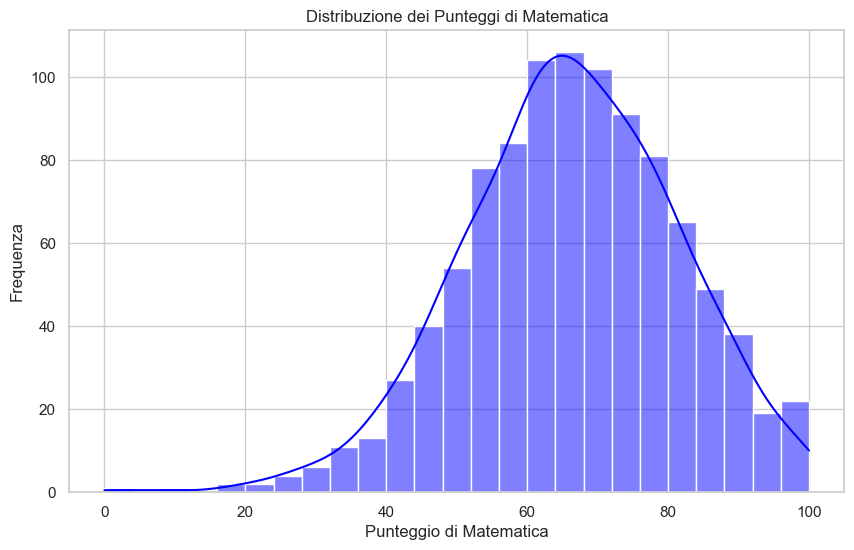

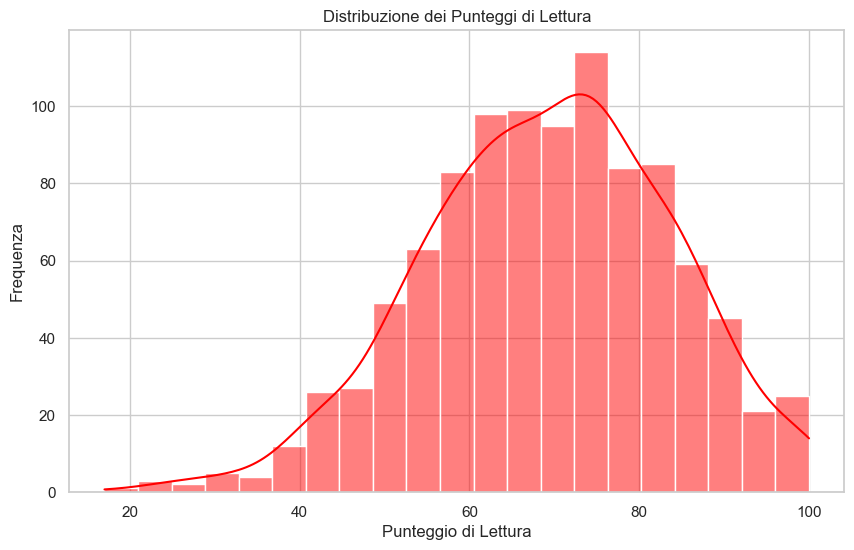

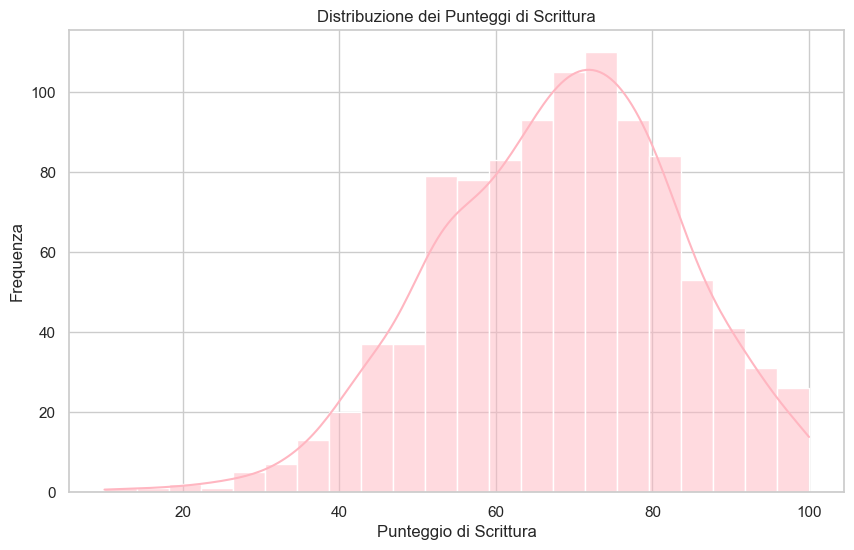

In [20]:
# Impostazioni di stile per i grafici
sns.set(style="whitegrid")

# Istogramma per i punteggi di matematica
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='math score', kde=True, color='blue')
plt.title('Distribuzione dei Punteggi di Matematica')
plt.xlabel('Punteggio di Matematica')
plt.ylabel('Frequenza')
plt.show()

# Istogramma per i punteggi di lettura
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='reading score', kde=True, color='red')
plt.title('Distribuzione dei Punteggi di Lettura')
plt.xlabel('Punteggio di Lettura')
plt.ylabel('Frequenza')
plt.show()

# Istogramma per i punteggi di scrittura
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='writing score', kde=True, color='lightpink')
plt.title('Distribuzione dei Punteggi di Scrittura')
plt.xlabel('Punteggio di Scrittura')
plt.ylabel('Frequenza')
plt.show()


<h2 style="color:#b5e79f; padding:10px; text-align:left; text-shadow: 1px 1px 1px #000000; "> Correlazioni tra i punteggi </h2>

<p style="background-color:#b5e79f; padding:15px; border-radius:5px; line-height:1.6;box-shadow: 0 0 10px rgba(0, 0, 0, 0.1)">
Qui possiamo visualizzare la matrice di correlazione tra i punteggi di matematica, lettura e scrittura. La heatmap aiuta a identificare le relazioni tra le varie misurazioni. Ecco una spiegazione passo per passo del codice:
</p>

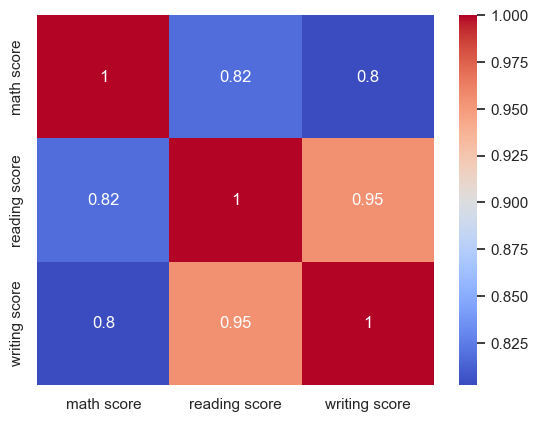

In [21]:

corr = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


<h2 style="color:#E7DDFF; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> La creazione di modelli  </h2>

<div style="font-family: Arial, sans-serif; line-height: 1.6; background-color: #E7DDFF; padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
    <p>
        I modelli di predizione sono strumenti fondamentali nel campo dell'apprendimento automatico e della statistica, utilizzati per prevedere valori futuri o sconosciuti basandosi su dati storici. Questi modelli analizzano le relazioni tra le variabili di input (caratteristiche) e le variabili di output (target) per formulare previsioni accurate. Nel contesto del nostro studio, ci concentreremo su cinque diversi modelli di regressione: Linear Regression, Random Forest Regressor, Support Vector Machine (SVM), KNeighbors Regressor e Decision Tree Regressor. Ogni modello ha i propri punti di forza e debolezze, influenzando l'affidabilità delle previsioni a seconda della natura dei dati e del problema specifico. Attraverso un confronto sistematico di queste tecniche, proveremo a determinare quale di questi modelli offre le previsioni più affidabili e accurate per il nostro set di dati.ù

Per garantire che i nostri risultati siano robusti e generalizzabili, utilizzeremo la validazione incrociata K-Fold. La validazione K-Fold è una tecnica di valutazione che suddivide i dati in K sottoinsiemi (o "fold"). Il modello viene addestrato su K-1 di questi sottoinsiemi e testato sull'ultimo sottoinsieme, ripetendo il processo K volte in modo che ogni sottoinsieme venga utilizzato esattamente una volta come set di test. Questa metodologia permette di mitigare il problema dell'overfitting, fornendo una stima più accurata delle prestazioni del modello su dati non visti. Utilizzando la validazione K-Fold, possiamo ottenere una valutazione più affidabile e stabile delle capacità predittive di ciascun modello, migliorando la nostra capacità di selezionare il modello più adatto per le nostre esigenze.
        </p>
</div>



<div style="font-family: Arial, sans-serif; line-height: 1.6; background-color: #E7E8E7; padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
<h3 style="color:0000; padding:10px; text-align:left"> Linear Regression </h3>
<p>
La regressione lineare è un metodo statistico semplice ma potente utilizzato per modellare la relazione tra una variabile dipendente (target) e una o più variabili indipendenti (caratteristiche). Questo modello assume che esista una relazione lineare tra le variabili e cerca di trovare la retta che meglio rappresenta questa relazione. La retta è determinata minimizzando la somma dei quadrati delle differenze tra i valori osservati e quelli previsti.

Nel codice seguente, la regressione lineare viene utilizzata per prevedere i punteggi degli studenti (ad esempio, punteggi in matematica, lettura o scrittura) sulla base della loro razza/etnia. Questo approccio è una buona scelta iniziale perché la regressione lineare è facile da implementare, interpretare e computazionalmente efficiente, rendendola ideale per una prima esplorazione dei dati.
</p>
</div>

In [3]:
# Converte la colonna "race/ethnicity" da testo a numeri per poterla usare nel modello.
le = LabelEncoder()
df["race/ethnicity"] = le.fit_transform(df["race/ethnicity"])

for _ in range(3):
    # Chiede all'utente quale punteggio desidera calcolare
    score_type = input("Quale punteggio desideri calcolare? (math score, reading score, writing score): ").strip().lower()

    if score_type not in ["math score", "reading score", "writing score"]:
        print("Errore: Tipo di punteggio non valido. Scegli tra 'math score', 'reading score' o 'writing score'.")
    else:
        # Suddivide i dati in caratteristiche (X) e target (y)
        X = df[["race/ethnicity"]]
        y = df[score_type]

        # Suddivide i dati in set di addestramento e di test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Inizializza e addestra il modello di regressione lineare
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Aggiunge la validazione K-Fold
        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        # Previsioni usando cross_val_predict
        y_pred = cross_val_predict(model, X, y, cv=kf)

        # Calcolo delle metriche
        results = {
            'Mean Squared Error': mean_squared_error(y, y_pred),
            'Mean Absolute Error': mean_absolute_error(y, y_pred),
            'R2 Score': r2_score(y, y_pred)
        }

        # Stampa dei risultati
        for metric, value in results.items():
            print(f"{metric}: {value}")

        # Prevede il punteggio per un gruppo specifico
        group_name = input("Inserisci il nome del gruppo di cui vuoi predirre il punteggio: ").strip()

        # Verifica se il gruppo esiste
        if group_name in le.classes_:
            group_encoded = le.transform([group_name])
            predicted_score = model.predict([[group_encoded[0]]])
            print(f"Il punteggio previsto per il gruppo {group_name} è {predicted_score[0]}")
        else:
            print(f"Errore: il gruppo {group_name} non è presente nei dati.")


Quale punteggio desideri calcolare? (math score, reading score, writing score): math score
Mean Squared Error: 219.62496280412714
Mean Absolute Error: 11.664190033028127
R2 Score: 0.043816259091155274
Inserisci il nome del gruppo di cui vuoi predirre il punteggio: group A
Il punteggio previsto per il gruppo group A è 60.728626347231206
Quale punteggio desideri calcolare? (math score, reading score, writing score): reading score
Mean Squared Error: 208.9074403297016
Mean Absolute Error: 11.58205672123991
R2 Score: 0.01899484546546293
Inserisci il nome del gruppo di cui vuoi predirre il punteggio: group A
Il punteggio previsto per il gruppo group A è 65.6034134727211
Quale punteggio desideri calcolare? (math score, reading score, writing score): writing score
Mean Squared Error: 224.8088655497238
Mean Absolute Error: 11.985926504362771
R2 Score: 0.02543910452013609
Inserisci il nome del gruppo di cui vuoi predirre il punteggio: group A
Il punteggio previsto per il gruppo group A è 63.819

<div style="font-family: Arial, sans-serif; line-height: 1.6; background-color: #E7E8E7; padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
<h3 style="color:0000; padding:10px; text-align:left"> Random Forest Regressor </h3>
<p>
    Il Random Forest Regressor è un algoritmo di machine learning utilizzato per problemi di regressione. Si basa su un insieme di alberi decisionali, noti come "forest", e utilizza il principio dell'ensemble learning per migliorare le prestazioni predittive rispetto a un singolo albero decisionale.

In poche parole, Random Forest combina molteplici alberi decisionali allenati su sottoinsiemi casuali del dataset di addestramento. Durante la previsione, ogni albero nel bosco emette una previsione e la previsione finale è la media (nel caso della regressione) delle previsioni di tutti gli alberi. Questo approccio riduce il rischio di overfitting e migliora la generalizzazione del modello.
    
Il codice qui sotto utilizza lo utilizza per prevedere i punteggi (matematica, lettura, scrittura) basandosi sull'etnia dei partecipanti. Prima trasforma l'etnia da testo a numeri, poi addestra il modello su un set di dati di addestramento e lo valida usando la tecnica K-Fold Cross Validation. Questo aiuta a valutare le prestazioni del modello in modo robusto. Infine, consente all'utente di prevedere il punteggio per un gruppo specifico. Questo approccio sembra una buona scelta poiché fornisce stime accurate delle prestazioni del modello e gestisce gruppi diversi nel dataset.
    
</p>
</div>

<div style="font-family: Arial, sans-serif; line-height: 1.6; background-color: #E7E8E7; padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
<h3 style="color:0000; padding:10px; text-align:left"> DecisionTreeRegressor </h3>
<p>
Il Decision Tree Regressor è un algoritmo di apprendimento supervisionato utilizzato per problemi di regressione. Funziona creando un albero decisionale in cui ogni nodo interno rappresenta un test su un attributo, ogni ramo rappresenta l'esito di quel test e ogni foglia rappresenta un valore di output numerico. Durante l'addestramento, l'algoritmo cerca di suddividere i dati in modo da ridurre l'errore di predizione, creando nodi e rami che meglio separano i dati in base alle caratteristiche. Quando si effettua una previsione per un nuovo punto dati, l'algoritmo attraversa l'albero decisionale in base alle caratteristiche del punto e restituisce il valore previsto associato alla foglia in cui si trova. In sintesi, il Decision Tree Regressor suddivide lo spazio delle caratteristiche in regioni basate su decisioni basate su regole, consentendo la previsione di valori numerici.
    
Questo codice utilizza un modello Decision Tree Regressor per prevedere i punteggi (matematica, lettura, scrittura) basati sull'etnia dei partecipanti. Prima di procedere con l'addestramento, la colonna "race/ethnicity" viene convertita da testo a numeri utilizzando LabelEncoder. Successivamente, il dataset viene suddiviso in caratteristiche (X) e target (y), seguito da una suddivisione dei dati in set di addestramento e di test.

Dopo aver inizializzato il modello Decision Tree Regressor, viene aggiunta la validazione K-Fold utilizzando la classe KFold. Questo aiuta a valutare le prestazioni del modello in modo robusto. Le previsioni vengono effettuate utilizzando la funzione cross_val_predict per ottenere stime dei punteggi.
</p>
</div>
    

In [4]:
# Converte la colonna "race/ethnicity" da testo a numeri per poterla usare nel modello.
le = LabelEncoder()
df["race/ethnicity"] = le.fit_transform(df["race/ethnicity"])

for _ in range(3):
    # Chiede all'utente quale punteggio desidera calcolare
    score_type = input("Quale punteggio desideri calcolare? (math score, reading score, writing score): ").strip().lower()

    if score_type not in ["math score", "reading score", "writing score"]:
        print("Errore: Tipo di punteggio non valido. Scegli tra 'math score', 'reading score' o 'writing score'.")
    else:
        # Suddivide i dati in caratteristiche (X) e target (y)
        X = df[["race/ethnicity"]]
        y = df[score_type]

        # Suddivide i dati in set di addestramento e di test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Inizializza e addestra il modello di regressione K-Neighbors
        model = KNeighborsRegressor()
        model.fit(X_train, y_train)

        # Aggiunge la validazione K-Fold
        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        # Previsioni usando cross_val_predict
        y_pred = cross_val_predict(model, X, y, cv=kf)

        # Calcolo delle metriche
        results = {
            'Mean Squared Error': mean_squared_error(y, y_pred),
            'Mean Absolute Error': mean_absolute_error(y, y_pred),
            'R2 Score': r2_score(y, y_pred)
        }

        # Stampa dei risultati
        for metric, value in results.items():
            print(f"{metric}: {value}")

        # Prevede il punteggio per un gruppo specifico
        group_name = input("Inserisci il nome del gruppo di cui vuoi predirre il punteggio: ").strip()

        # Verifica se il gruppo esiste
        if group_name in le.classes_:
            group_encoded = le.transform([group_name])
            predicted_score = model.predict([[group_encoded[0]]])
            print(f"Il punteggio previsto per il gruppo {group_name} è {predicted_score[0]}")
        else:
            print(f"Errore: il gruppo {group_name} non è presente nei dati.")


Quale punteggio desideri calcolare? (math score, reading score, writing score): math score
Mean Squared Error: 262.53716000000003
Mean Absolute Error: 13.0866
R2 Score: -0.14301107019546233
Inserisci il nome del gruppo di cui vuoi predirre il punteggio: group A
Il punteggio previsto per il gruppo group A è 58.6
Quale punteggio desideri calcolare? (math score, reading score, writing score): reading score
Mean Squared Error: 236.79047999999997
Mean Absolute Error: 12.395599999999998
R2 Score: -0.11194068080150021
Inserisci il nome del gruppo di cui vuoi predirre il punteggio: group A
Il punteggio previsto per il gruppo group A è 59.8
Quale punteggio desideri calcolare? (math score, reading score, writing score): writing score
Mean Squared Error: 254.96036
Mean Absolute Error: 13.0038
R2 Score: -0.10526956375085783
Inserisci il nome del gruppo di cui vuoi predirre il punteggio: group A
Il punteggio previsto per il gruppo group A è 59.8


In [3]:
# Converte la colonna "race/ethnicity" da testo a numeri per poterla usare nel modello.
le = LabelEncoder()
df["race/ethnicity"] = le.fit_transform(df["race/ethnicity"])

for _ in range(3):
    # Chiede all'utente quale punteggio desidera calcolare
    score_type = input("Quale punteggio desideri calcolare? (math score, reading score, writing score): ").strip().lower()

    if score_type not in ["math score", "reading score", "writing score"]:
        print("Errore: Tipo di punteggio non valido. Scegli tra 'math score', 'reading score' o 'writing score'.")
    else:
        # Suddivide i dati in caratteristiche (X) e target (y)
        X = df[["race/ethnicity"]]
        y = df[score_type]

        # Suddivide i dati in set di addestramento e di test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Inizializza il modello di regressione ad albero decisionale
        model = DecisionTreeRegressor()

        # Aggiunge la validazione K-Fold
        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        # Previsioni usando cross_val_predict
        y_pred = cross_val_predict(model, X, y, cv=kf)
        results = {
            'Mean Squared Error': mean_squared_error(y, y_pred),
            'Mean Absolute Error': mean_absolute_error(y, y_pred),
            'R2 Score': r2_score(y, y_pred)
        }

        # Stampa dei risultati
        for metric, value in results.items():
            print(f"{metric}: {value}")

        # Addestra il modello sui dati di addestramento
        model.fit(X_train, y_train)

        # Prevede il punteggio per un gruppo specifico
        group_name = input("Inserisci il nome del gruppo di cui vuoi predirre il punteggio: ").strip()

        # Verifica se il gruppo esiste
        if group_name in le.classes_:
            group_encoded = le.transform([group_name])
            predicted_score = model.predict([[group_encoded[0]]])
            print(f"Il punteggio previsto per il gruppo {group_name} è {predicted_score[0]}")
        else:
            print(f"Errore: il gruppo {group_name} non è presente nei dati.")


Quale punteggio desideri calcolare? (math score, reading score, writing score): math score
Mean Squared Error: 220.17632429698367
Mean Absolute Error: 11.678188872477662
R2 Score: 0.04141579018224162
Inserisci il nome del gruppo di cui vuoi predirre il punteggio: group A
Il punteggio previsto per il gruppo group A è 63.94202898550725
Quale punteggio desideri calcolare? (math score, reading score, writing score): reading score
Mean Squared Error: 210.2929283005325
Mean Absolute Error: 11.608099043248679
R2 Score: 0.012488754352644404
Inserisci il nome del gruppo di cui vuoi predirre il punteggio: group A
Il punteggio previsto per il gruppo group A è 66.30434782608695
Quale punteggio desideri calcolare? (math score, reading score, writing score): writing score
Mean Squared Error: 226.17249188738282
Mean Absolute Error: 12.008710142269964
R2 Score: 0.019527696616007062
Inserisci il nome del gruppo di cui vuoi predirre il punteggio: group A
Il punteggio previsto per il gruppo group A è 63.

<div style="font-family: Arial, sans-serif; line-height: 1.6; background-color: #E7DDFF; padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
    <h3 style="color:0000; padding:10px; text-align:left"> Accuracy </h3>
    <p>
L'accuracy è una misura di performance comunemente usata nel contesto del machine learning e delle statistiche. Essenzialmente, rappresenta la proporzione di predizioni corrette rispetto al totale delle predizioni effettuate da un modello. In altre parole, è la percentuale di casi in cui il modello ha fatto una previsione corretta.
        </p>
</div>



In [6]:
# Converte la colonna "race/ethnicity" da testo a numeri per poterla usare nel modello.
le = LabelEncoder()
df["race/ethnicity"] = le.fit_transform(df["race/ethnicity"])

# Converte "math score" in una variabile binaria (ad esempio, superiore o inferiore a 70)
df["math score binary"] = (df["math score"] > 70).astype(int)

# Suddivide i dati in caratteristiche (X) e target (y)
X = df[["race/ethnicity"]]
y = df["math score binary"]

# Scala le caratteristiche
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definisce i modelli
models = {
    'Linear Regression': LinearRegression(),
    'Random': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Risultati
results = {}
for name, model in models.items():
    if name == 'Linear Regression':
        # Esegui cross_val_predict per ottenere le previsioni continue
        y_pred_continuous = cross_val_predict(model, X_scaled, y, cv=kf)
        # Converti le previsioni continue in probabilità utilizzando la funzione sigmoide
        y_pred_proba = 1 / (1 + np.exp(-y_pred_continuous))
        # Converti le probabilità in previsioni binarie
        y_pred = (y_pred_proba > 0.5).astype(int)
    else:
        # Esecuzione di predizioni tramite cross-validation per ogni modello
        y_pred = cross_val_predict(model, X_scaled, y, cv=kf)
        if hasattr(model, 'predict_proba'):
            y_pred_proba = cross_val_predict(model, X_scaled, y, cv=kf, method='predict_proba')[:, 1]
        else:
            y_pred_proba = cross_val_predict(model, X_scaled, y, cv=kf, method='decision_function')
            y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())

    results[name] = {
        'Accuracy': accuracy_score(y, y_pred),  # Quanto frequentemente il modello predice correttamente.
        'Precision': precision_score(y, y_pred),  # Proporzione di identificazioni positive che erano corrette.
        'Recall': recall_score(y, y_pred),  # Proporzione di positivi reali che sono stati identificati correttamente.
        'F1 Score': f1_score(y, y_pred),  # Media armonica di Precision e Recall.
        'ROC AUC': roc_auc_score(y, y_pred_proba),  # Area sotto la curva ROC.
        'Log Loss': log_loss(y, y_pred_proba),  # Misura l'incertezza delle previsioni basata sulle probabilità.
        'Mean Squared Error': mean_squared_error(y, y_pred),
        'Mean Absolute Error': mean_absolute_error(y, y_pred),
        'R2 Score': r2_score(y, y_pred)
    }

# Stampa dei risultati
for model, metrics in results.items():
    print(f"Model: {model}")
    
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    print("\n")


Model: Linear Regression
Accuracy: 0.3910
Precision: 0.3910
Recall: 1.0000
F1 Score: 0.5622
ROC AUC: 0.6016
Log Loss: 0.7476
Mean Squared Error: 0.6090
Mean Absolute Error: 0.6090
R2 Score: -1.5575


Model: Random
Accuracy: 0.6410
Precision: 0.6143
Recall: 0.2199
F1 Score: 0.3239
ROC AUC: 0.5770
Log Loss: 0.6535
Mean Squared Error: 0.3590
Mean Absolute Error: 0.3590
R2 Score: -0.5076


Model: SVM
Accuracy: 0.6090
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.4500
Log Loss: 0.6774
Mean Squared Error: 0.3910
Mean Absolute Error: 0.3910
R2 Score: -0.6420


Model: KNeighbors
Accuracy: 0.6210
Precision: 0.5500
Recall: 0.1688
F1 Score: 0.2583
ROC AUC: 0.5648
Log Loss: 3.3742
Mean Squared Error: 0.3790
Mean Absolute Error: 0.3790
R2 Score: -0.5916


Model: Decision Tree
Accuracy: 0.6410
Precision: 0.6143
Recall: 0.2199
F1 Score: 0.3239
ROC AUC: 0.5782
Log Loss: 0.6538
Mean Squared Error: 0.3590
Mean Absolute Error: 0.3590
R2 Score: -0.5076




<div style="font-family: Arial, sans-serif; line-height: 1.6; background-color: #E7DDFF; padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
    <p>
Dopo una revisione accurata, possiamo concludere il modello Random Forest è il migliore in termini di combinazione di metriche e performance generale. Anche se ha una ROC AUC leggermente inferiore rispetto al Decision Tree, offre una robustezza migliore grazie alla sua natura di ensemble che riduce l'overfitting.
        </p>
</div>